In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from statsmodels.formula.api import ols

## 分散分析

In [25]:
# 1. データ読み込み
df = pd.read_csv("../logs/result_20251201162005.csv")

# 2. 因子列と応答変数
factor_cols = ["PERIOD_MA_1", "PERIOD_MA_2", "PERIOD_MR", "THRESHOLD_MR"]
X = df[factor_cols]
y = df["total"]

# 3. 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=factor_cols)

# 4. 標準化した因子を df に置き換え
for col in factor_cols:
    df[col] = X_scaled_df[col]

# 5. OLSモデル（RSM式）
formula = (
    "total ~ PERIOD_MA_1 + PERIOD_MA_2 + PERIOD_MR + THRESHOLD_MR "
    "+ I(PERIOD_MA_1**2) + I(PERIOD_MA_2**2) + I(PERIOD_MR**2) + I(THRESHOLD_MR**2) "
    "+ PERIOD_MA_1:PERIOD_MA_2 + PERIOD_MR:THRESHOLD_MR"
)
model = ols(formula, data=df).fit()

# 6. 分散分析 (Type II)
anova_table = sm.stats.anova_lm(model, typ=2)
print("=== ANOVA (Type II) ===")
print(anova_table)

=== ANOVA (Type II) ===
                                sum_sq     df          F        PR(>F)
PERIOD_MA_1                 261.950617    1.0   0.468404  4.944054e-01
PERIOD_MA_2                9172.598765    1.0  16.401877  6.987908e-05
PERIOD_MR                  4512.500000    1.0   8.068975  4.903203e-03
THRESHOLD_MR              34147.555556    1.0  61.060558  1.914649e-13
I(PERIOD_MA_1 ** 2)          42.666667    1.0   0.076294  7.826300e-01
I(PERIOD_MA_2 ** 2)       12120.018519    1.0  21.672271  5.443128e-06
I(PERIOD_MR ** 2)           220.018519    1.0   0.393424  5.311221e-01
I(THRESHOLD_MR ** 2)       5280.666667    1.0   9.442563  2.373541e-03
PERIOD_MA_1:PERIOD_MA_2     149.342593    1.0   0.267045  6.058130e-01
PERIOD_MR:THRESHOLD_MR       33.333333    1.0   0.059605  8.073377e-01
Residual                 129743.867284  232.0        NaN           NaN


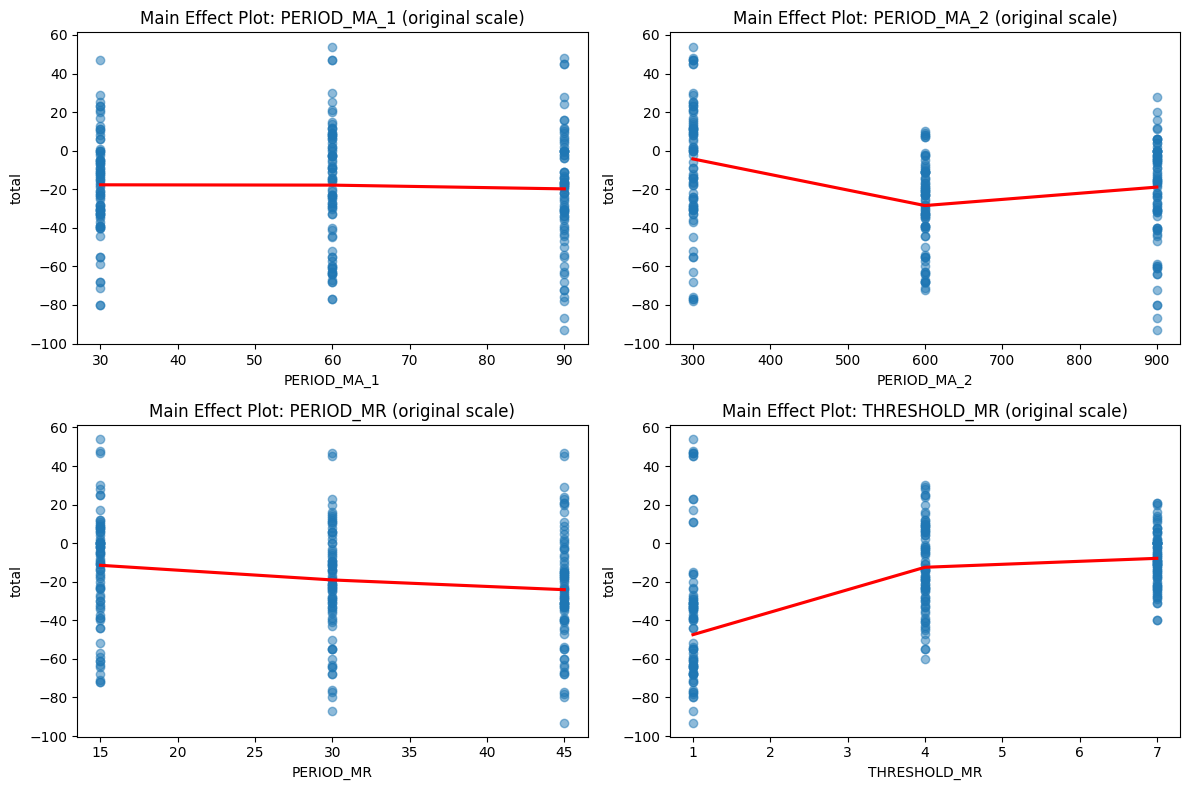

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# データ読み込み
df = pd.read_csv("../logs/result_20251201162005.csv")

# 因子列と応答変数
factor_cols = ["PERIOD_MA_1", "PERIOD_MA_2", "PERIOD_MR", "THRESHOLD_MR"]
X = df[factor_cols]
y = df["total"]

# 標準化（モデル用）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 要因効果図（元スケールで表示）
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for ax, col in zip(axes.flatten(), factor_cols):
    sns.regplot(
        x=X[col],
        y=y,
        lowess=True,
        ax=ax,
        scatter_kws={"alpha": 0.5},
        line_kws={"color": "red"},
    )
    ax.set_title(f"Main Effect Plot: {col} (original scale)")
    ax.set_xlabel(col)
    ax.set_ylabel("total")

plt.tight_layout()
plt.show()

## RSM

In [27]:
# データ読み込み
df = pd.read_csv("../logs/result_20251201162005.csv")

# 因子列と応答変数
factor_cols = ["PERIOD_MA_1", "PERIOD_MA_2", "PERIOD_MR", "THRESHOLD_MR"]
X = df[factor_cols]
y = df["total"]

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=factor_cols)

# 標準化した因子を df に置き換え
for col in factor_cols:
    df[col] = X_scaled_df[col]

# RSM（二次回帰モデル）
formula = (
    "total ~ PERIOD_MA_1 + PERIOD_MA_2 + PERIOD_MR + THRESHOLD_MR "
    "+ I(PERIOD_MA_1**2) + I(PERIOD_MA_2**2) + I(PERIOD_MR**2) + I(THRESHOLD_MR**2) "
    "+ PERIOD_MA_1:PERIOD_MA_2 + PERIOD_MR:THRESHOLD_MR"
)
model_rsm = ols(formula, data=df).fit()

print("=== RSM (OLS Regression with standardized factors) ===")
print(model_rsm.summary())

=== RSM (OLS Regression with standardized factors) ===
                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     11.79
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           2.25e-16
Time:                        10:49:30   Log-Likelihood:                -1107.9
No. Observations:                 243   AIC:                             2238.
Df Residuals:                     232   BIC:                             2276.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

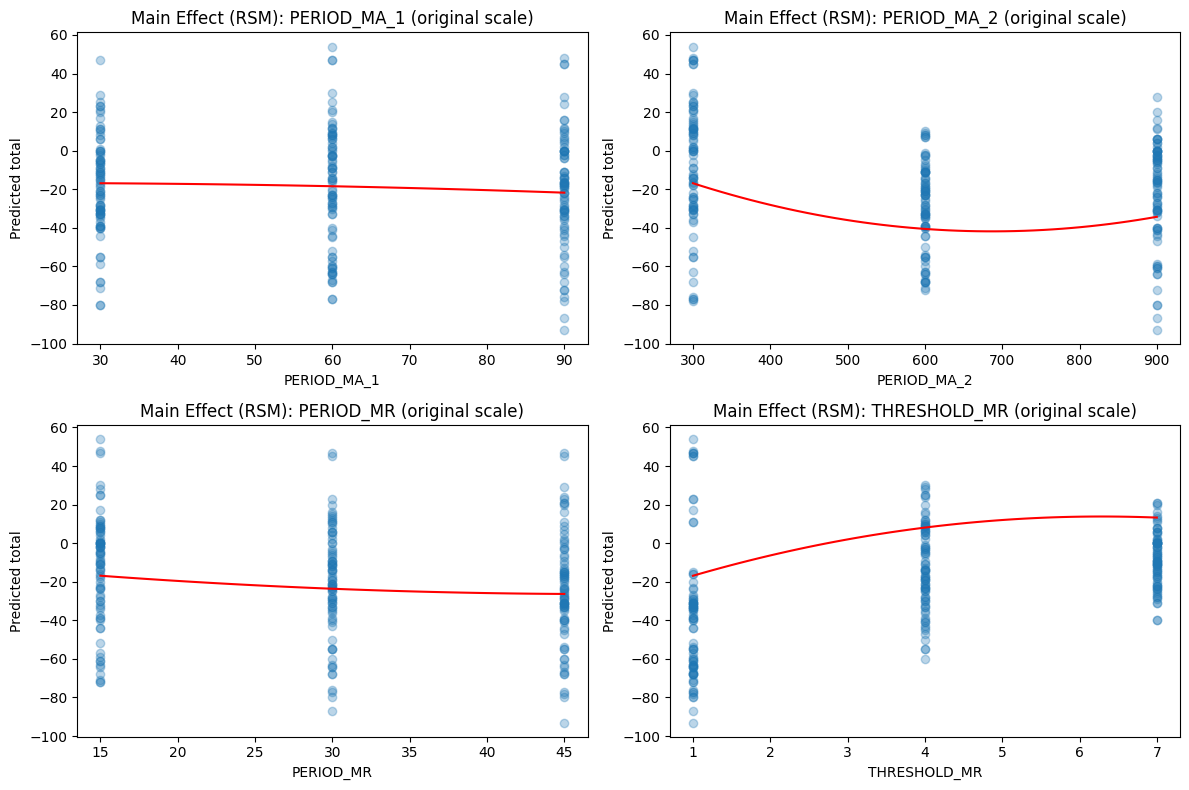

In [28]:
# 1. データ読み込み（元スケールを保持）
df_original = pd.read_csv("../logs/result_20251201162005.csv")

# 2. 因子列と応答変数
factor_cols = ["PERIOD_MA_1", "PERIOD_MA_2", "PERIOD_MR", "THRESHOLD_MR"]
y = df_original["total"]

# 3. 標準化（モデル用）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_original[factor_cols])
X_scaled_df = pd.DataFrame(X_scaled, columns=factor_cols)

# 4. 標準化した因子を df に置き換え
df = df_original.copy()
for col in factor_cols:
    df[col] = X_scaled_df[col]

# 5. RSM（二次回帰モデル）
formula = (
    "total ~ PERIOD_MA_1 + PERIOD_MA_2 + PERIOD_MR + THRESHOLD_MR "
    "+ I(PERIOD_MA_1**2) + I(PERIOD_MA_2**2) + I(PERIOD_MR**2) + I(THRESHOLD_MR**2) "
    "+ PERIOD_MA_1:PERIOD_MA_2 + PERIOD_MR:THRESHOLD_MR"
)
model_rsm = ols(formula, data=df).fit()

# 6. 主効果プロット（実スケールで表示）
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for ax, col in zip(axes.flatten(), factor_cols):
    # 実スケールでグリッド作成
    grid = np.linspace(df_original[col].min(), df_original[col].max(), 50)

    preds = []
    for val in grid:
        # 実スケールの値を標準化して DataFrame に渡す
        temp = df_original[factor_cols].copy()
        temp[col] = val
        temp_scaled = pd.DataFrame(scaler.transform(temp), columns=factor_cols)
        preds.append(model_rsm.predict(temp_scaled)[0])

    # 実スケールで描画
    ax.plot(grid, preds, color="red")
    ax.scatter(df_original[col], y, alpha=0.3)
    ax.set_title(f"Main Effect (RSM): {col} (original scale)")
    ax.set_xlabel(col)
    ax.set_ylabel("Predicted total")

plt.tight_layout()
plt.show()

## RSM＋Lasso

In [29]:
# データ読み込み
df = pd.read_csv("../logs/result_20251201162005.csv")

# 因子列と応答変数
factor_cols = ["PERIOD_MA_1", "PERIOD_MA_2", "PERIOD_MR", "THRESHOLD_MR"]
X = df[factor_cols]
y = df["total"]

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=factor_cols)

# 標準化した因子を df に置き換え
for col in factor_cols:
    df[col] = X_scaled_df[col]

# --- RSM（二次回帰モデル） ---
formula = (
    "total ~ PERIOD_MA_1 + PERIOD_MA_2 + PERIOD_MR + THRESHOLD_MR "
    "+ I(PERIOD_MA_1**2) + I(PERIOD_MA_2**2) + I(PERIOD_MR**2) + I(THRESHOLD_MR**2) "
    "+ PERIOD_MA_1:PERIOD_MA_2 + PERIOD_MR:THRESHOLD_MR"
)
model_rsm = ols(formula, data=df).fit()
print("=== RSM (OLS Regression with standardized factors) ===")
print(model_rsm.summary())

# --- Lasso（二次回帰＋正則化） ---
poly = PolynomialFeatures(degree=2, include_bias=False)
lasso = LassoCV(cv=5, random_state=0)
model_lasso = make_pipeline(poly, lasso).fit(X_scaled, y)

print("=== Lasso Regression (with standardized factors) ===")
print("Best alpha:", model_lasso.named_steps["lassocv"].alpha_)
print("R^2:", model_lasso.score(X_scaled, y))
print("Coefficients:", model_lasso.named_steps["lassocv"].coef_)

=== RSM (OLS Regression with standardized factors) ===
                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     11.79
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           2.25e-16
Time:                        10:49:34   Log-Likelihood:                -1107.9
No. Observations:                 243   AIC:                             2238.
Df Residuals:                     232   BIC:                             2276.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

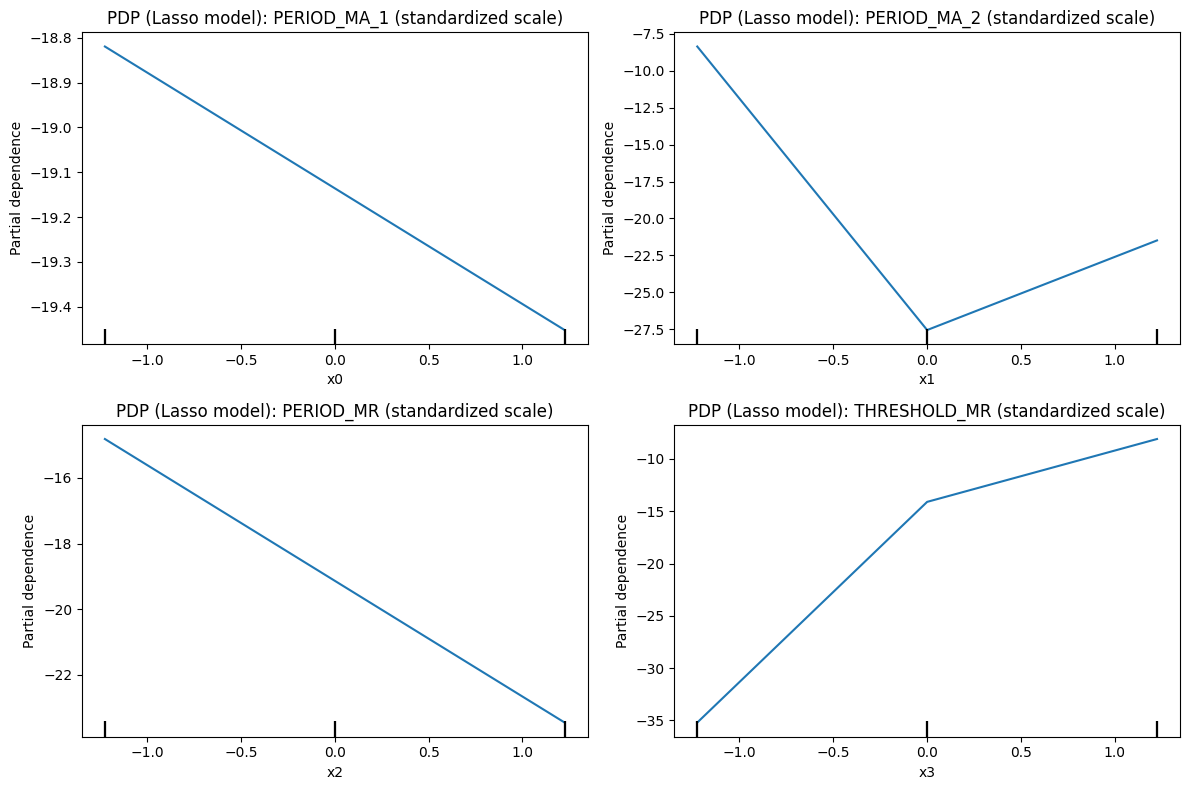

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import PartialDependenceDisplay
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# 1. データ読み込み
df = pd.read_csv("../logs/result_20251201162005.csv")

# 2. 因子列と応答変数
factor_cols = ["PERIOD_MA_1", "PERIOD_MA_2", "PERIOD_MR", "THRESHOLD_MR"]
X = df[factor_cols]
y = df["total"]

# 3. 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Lasso モデル構築（二次項含む）
poly = PolynomialFeatures(degree=2, include_bias=False)
lasso = LassoCV(cv=5, random_state=0)
model_lasso = make_pipeline(poly, lasso).fit(X_scaled, y)

# 5. Partial Dependence Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for ax, col in zip(axes.flatten(), factor_cols):
    PartialDependenceDisplay.from_estimator(
        model_lasso, X_scaled, [factor_cols.index(col)], ax=ax
    )
    ax.set_title(f"PDP (Lasso model): {col} (standardized scale)")

plt.tight_layout()
plt.show()